# Presenting and loading recipe output in a notebook

The goal of this notebook is to expand the functionality to run recipes directly from the notebook. Specifically, it demonstrates the API to retrieve the output, and display or load it in Python.

See associated PR here: https://github.com/ESMValGroup/ESMValCore/pull/957

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from esmvalcore.experimental import CFG

/home/stef/r/esmvalcore/esmvalcore/experimental/_warnings.py:18: UserWarning: 
  Thank you for trying out the new ESMValCore API.
  Note that this API is experimental and may be subject to change.
  More info: https://github.com/ESMValGroup/ESMValCore/issues/498
/home/stef/r/esmvalcore/esmvalcore/experimental/config/_config_validators.py:254: ESMValToolDeprecationWarning: `write_plots` will be removed in 2.2.0.
/home/stef/r/esmvalcore/esmvalcore/experimental/config/_config_validators.py:255: ESMValToolDeprecationWarning: `write_netcdf` will be removed in 2.2.0.
/home/stef/r/esmvalcore/esmvalcore/experimental/config/_config_validators.py:256: ESMValToolDeprecationWarning: `output_file_type` will be removed in 2.2.0.


## Getting a recipe

Recipes can be obtained by their name, similar to what one may already be familiar with through `esmvaltool recipes list`. To do so, use `get_recipe`.

In [3]:
from esmvalcore.experimental import get_recipe

recipe = get_recipe('examples/recipe_python.yml')
recipe

## Recipe python

Example recipe that plots a map and timeseries of temperature.

### Authors
 - Bouwe Andela (NLeSC, Netherlands; https://orcid.org/0000-0001-9005-8940)
 - Mattia Righi (DLR, Germany; https://orcid.org/0000-0003-3827-5950)

### Maintainers
 - Manuel Schlund (DLR, Germany; https://orcid.org/0000-0001-5251-0158)

### Projects
 - DLR project ESMVal
 - Copernicus Climate Change Service 34a Lot 2 (MAGIC) project

### References
 - Please acknowledge the project\(s\)\.


## Running a recipe and retrieving output

Run the recipe by using the `.run` method. 

The session can be defined as an arguement, but if left out, a new session is created automatically.

Under the hood it calls `esmvalcore._recipe.Recipe` with the session config. The logger is redirected automatically to `main_log_debug.txt` / `main_log.txt` in the appropriate directory.

In [4]:
recipe_output = recipe.run()

{'auxiliary_data_dir': PosixPath('/home/stef/auxiliary_data'),
 'compress_netcdf': False,
 'config_developer_file': None,
 'config_file': PosixPath('/home/stef/.esmvaltool/config-user.yml'),
 'drs': {'CMIP5': 'default', 'CMIP6': 'default'},
 'exit_on_warning': False,
 'log_level': 'info',
 'max_parallel_tasks': None,
 'output_dir': PosixPath('/home/stef/esmvaltool_output'),
 'output_file_type': 'png',
 'plot_dir': PosixPath('/home/stef/esmvaltool_output/recipe_python_20210125_101426/plots'),
 'preproc_dir': PosixPath('/home/stef/esmvaltool_output/recipe_python_20210125_101426/preproc'),
 'profile_diagnostic': False,
 'remove_preproc_dir': True,
 'rootpath': {'CMIP5': [PosixPath('/home/stef/data')],
              'CMIP6': [PosixPath('/home/stef/data'),
                        PosixPath('/home/stef/r/esmvaltool_sample_data/esmvaltool_sample_data/data/timeseries/CMIP6')],
              'default': [PosixPath('/home/stef/data')]},
 'run_dir': PosixPath('/home/stef/esmvaltool_output/recipe_p

/home/stef/miniconda3/envs/esmvaltool/lib/python3.8/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.


Calculated grid area shape: (1812, 64, 128)
Successfully completed task map/tas (priority 0) in 0:00:09.959061
Progress: 2 tasks running, 2 tasks waiting for ancestors, 1/5 done
Starting task map/script1 in process [2174]
Running command ['/home/stef/miniconda3/envs/esmvaltool/bin/python', '/home/stef/r/esmvaltool/esmvaltool/diag_scripts/examples/diagnostic.py', '/home/stef/esmvaltool_output/recipe_python_20210125_101426/run/map/script1/settings.yml']
Writing output to /home/stef/esmvaltool_output/recipe_python_20210125_101426/work/map/script1
Writing plots to /home/stef/esmvaltool_output/recipe_python_20210125_101426/plots/map/script1
Writing log to /home/stef/esmvaltool_output/recipe_python_20210125_101426/run/map/script1/log.txt
To re-run this diagnostic script, run:
cd /home/stef/esmvaltool_output/recipe_python_20210125_101426/run/map/script1; MPLBACKEND="Agg" /home/stef/miniconda3/envs/esmvaltool/bin/python /home/stef/r/esmvaltool/esmvaltool/diag_scripts/examples/diagnostic.py /ho

/home/stef/miniconda3/envs/esmvaltool/lib/python3.8/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.


Calculated grid area shape: (1812, 64, 128)
Maximum memory used (estimate): 0.2 GB
Sampled every second. It may be inaccurate if short but high spikes in memory consumption occur.
Successfully completed task map/script1 (priority 1) in 0:00:03.963685
Progress: 2 tasks running, 1 tasks waiting for ancestors, 2/5 done
Generated PreprocessorFile: /home/stef/esmvaltool_output/recipe_python_20210125_101426/preproc/timeseries/tas_amsterdam/MultiModelMean_Amon_tas_1850-2000.nc
Successfully completed task timeseries/tas_global (priority 3) in 0:00:15.041906
Progress: 1 tasks running, 1 tasks waiting for ancestors, 3/5 done
Successfully completed task timeseries/tas_amsterdam (priority 2) in 0:00:15.945265
Progress: 0 tasks running, 1 tasks waiting for ancestors, 4/5 done
Starting task timeseries/script1 in process [2171]
Running command ['/home/stef/miniconda3/envs/esmvaltool/bin/python', '/home/stef/r/esmvaltool/esmvaltool/diag_scripts/examples/diagnostic.py', '/home/stef/esmvaltool_output/re

Recipe output can also be retrieved using the `.get_output` method.

In [5]:
recipe_output = recipe.get_output()

`recipe_output` is a mapping of the individual tasks and their output filenames (data and image files) with a set of attributes describing the data.

In [6]:
recipe_output

map/script1:
  DataFile('CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_2000-2000.nc')
  ImageFile('CMIP5_CanESM2_Amon_historical_r1i1p1_tas_2000-2000.png')
  DataFile('CMIP5_CanESM2_Amon_historical_r1i1p1_tas_2000-2000.nc')
  ImageFile('CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_2000-2000.png')

timeseries/script1:
  DataFile('tas_global_CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_1850-2000.nc')
  DataFile('tas_amsterdam_CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_1850-2000.nc')
  DataFile('tas_global_CMIP5_CanESM2_Amon_historical_r1i1p1_tas_1850-2000.nc')
  ImageFile('tas_global_CMIP5_CanESM2_Amon_historical_r1i1p1_tas_1850-2000.png')
  ImageFile('tas_amsterdam_CMIP5_CanESM2_Amon_historical_r1i1p1_tas_1850-2000.png')
  DataFile('tas_amsterdam_CMIP5_CanESM2_Amon_historical_r1i1p1_tas_1850-2000.nc')
  ImageFile('tas_amsterdam_CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_1850-2000.png')
  ImageFile('tas_global_CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_1850-2000.png')
  ImageFile('tas_ams

Output is sorted by the task that produced them.

In [7]:
task_output = recipe_output['map/script1']

task_output

map/script1:
  DataFile('CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_2000-2000.nc')
  ImageFile('CMIP5_CanESM2_Amon_historical_r1i1p1_tas_2000-2000.png')
  DataFile('CMIP5_CanESM2_Amon_historical_r1i1p1_tas_2000-2000.nc')
  ImageFile('CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_2000-2000.png')

The task output has a list of files associated with them, usually image (`.png`) or data files (`.nc`). To get a list of all files, use `.files`:

In [8]:
print(task_output.files)

(DataFile('CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_2000-2000.nc'), ImageFile('CMIP5_CanESM2_Amon_historical_r1i1p1_tas_2000-2000.png'), DataFile('CMIP5_CanESM2_Amon_historical_r1i1p1_tas_2000-2000.nc'), ImageFile('CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_2000-2000.png'))


It is also possible to select the image files or data files only:

In [9]:
for image_file in task_output.image_files:
    print(image_file)

for data_file in task_output.data_files:
    print(data_file)

ImageFile('CMIP5_CanESM2_Amon_historical_r1i1p1_tas_2000-2000.png')
ImageFile('CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_2000-2000.png')
DataFile('CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_2000-2000.nc')
DataFile('CMIP5_CanESM2_Amon_historical_r1i1p1_tas_2000-2000.nc')


### Working with image files

Output comes in two kinds, `DataFile`s, which correspond to data files in `.nc` format and `ImageFile`s which correspond to plots in `.png` format. Both object are derived from the same base class (`OutputFile`) and therfore share most of the functionality.

Image output uses IPython magic to plot themselves in a notebook environment.

ImageFile('CMIP5_CanESM2_Amon_historical_r1i1p1_tas_2000-2000.png')
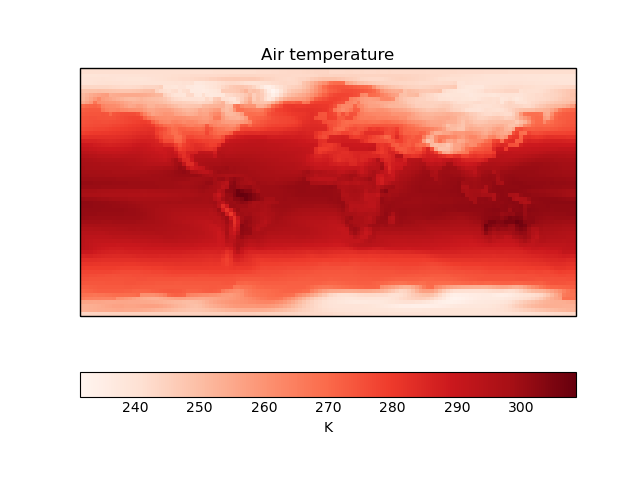

ImageFile('CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_2000-2000.png')
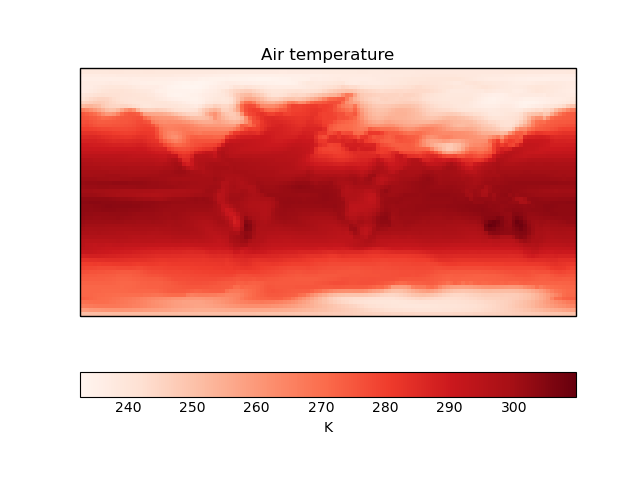

In [10]:
from IPython.display import display

task = recipe_output['map/script1']

for image_file in task.image_files:
     display(image_file)

The cell above specifically invokes the IPython magic using `display`, but this means you can do this:

ImageFile('CMIP5_CanESM2_Amon_historical_r1i1p1_tas_2000-2000.png')
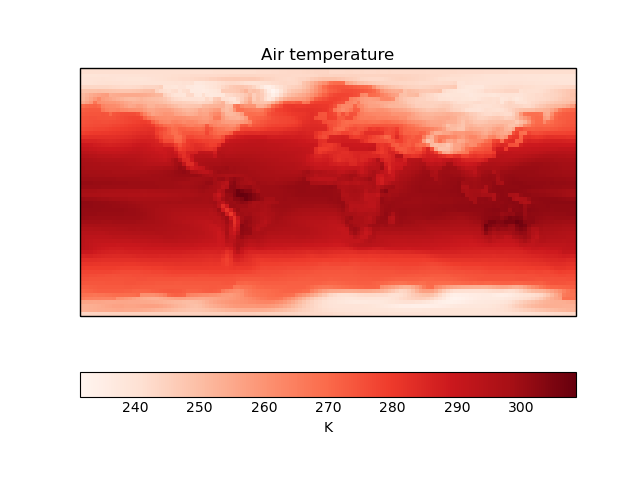

In [11]:
image_file = recipe_output['map/script1'].image_files[0]
image_file

### Working with data output

Data items only print the path...

In [12]:
data_files = recipe_output['timeseries/script1'].data_files

for data_file in task_output.data_files:
     print(data_file)

DataFile('CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_2000-2000.nc')
DataFile('CMIP5_CanESM2_Amon_historical_r1i1p1_tas_2000-2000.nc')


But, they can be easily loaded using `xarray`:

In [13]:
data_file = recipe_output['timeseries/script1'].data_files[0]

data = data_file.load_xarray()
type(data)

xarray.core.dataset.Dataset

Or `iris`:

In [14]:
cube = data_file.load_iris()
type(cube)

iris.cube.CubeList